In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
from gamma_transients import smallest_enc_circ


In [2]:
mec_radii = []
N = int(1e4)
for Nmax in tqdm(range(3,21)):
    # for i in tqdm(range(1000)):
    rvs = stats.multivariate_normal.rvs([0,0],cov=[[.1**2,0],[0,.1**2]],size=(N,Nmax))
    mec = np.array([smallest_enc_circ.make_circle(points) for points in rvs])
    mec_radii.append(mec[:,-1])

100%|██████████| 18/18 [00:19<00:00,  1.08s/it]


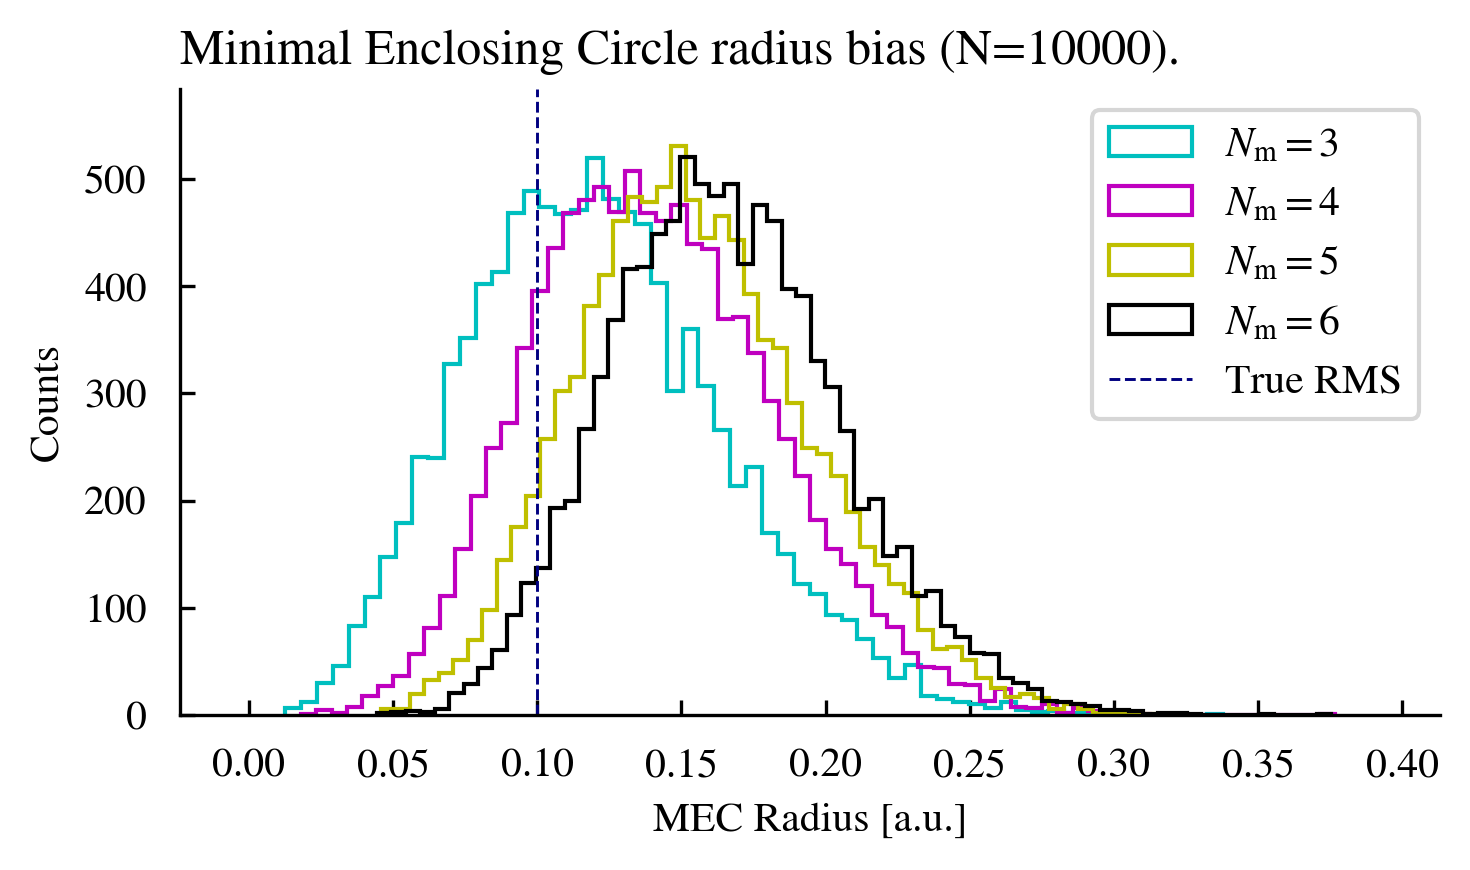

In [13]:
plt.figure(figsize=(5,3))
colors = ["c","m","y","k"]
for c,mec,nmax in zip(colors,mec_radii,[3,4,5,6]):
    plt.hist(mec,histtype="step",bins="fd",color=c,label=fr"$N_{{\mathrm{{m}}}} = {nmax}$")
ylim = plt.ylim()
plt.vlines(0.1,*ylim,color="navy",ls="--",label="True RMS")
plt.ylim(*ylim)
plt.legend()
plt.title(f"Minimal Enclosing Circle radius bias (N={N}).",loc="left")
plt.xlabel("MEC Radius [a.u.]")
plt.ylabel("Counts")
plt.savefig("figures/tests/sec_radius_bias.png",facecolor="white")
# plt.savefig("figures/tests/sec_radius_bias.pdf")
# plt.close()

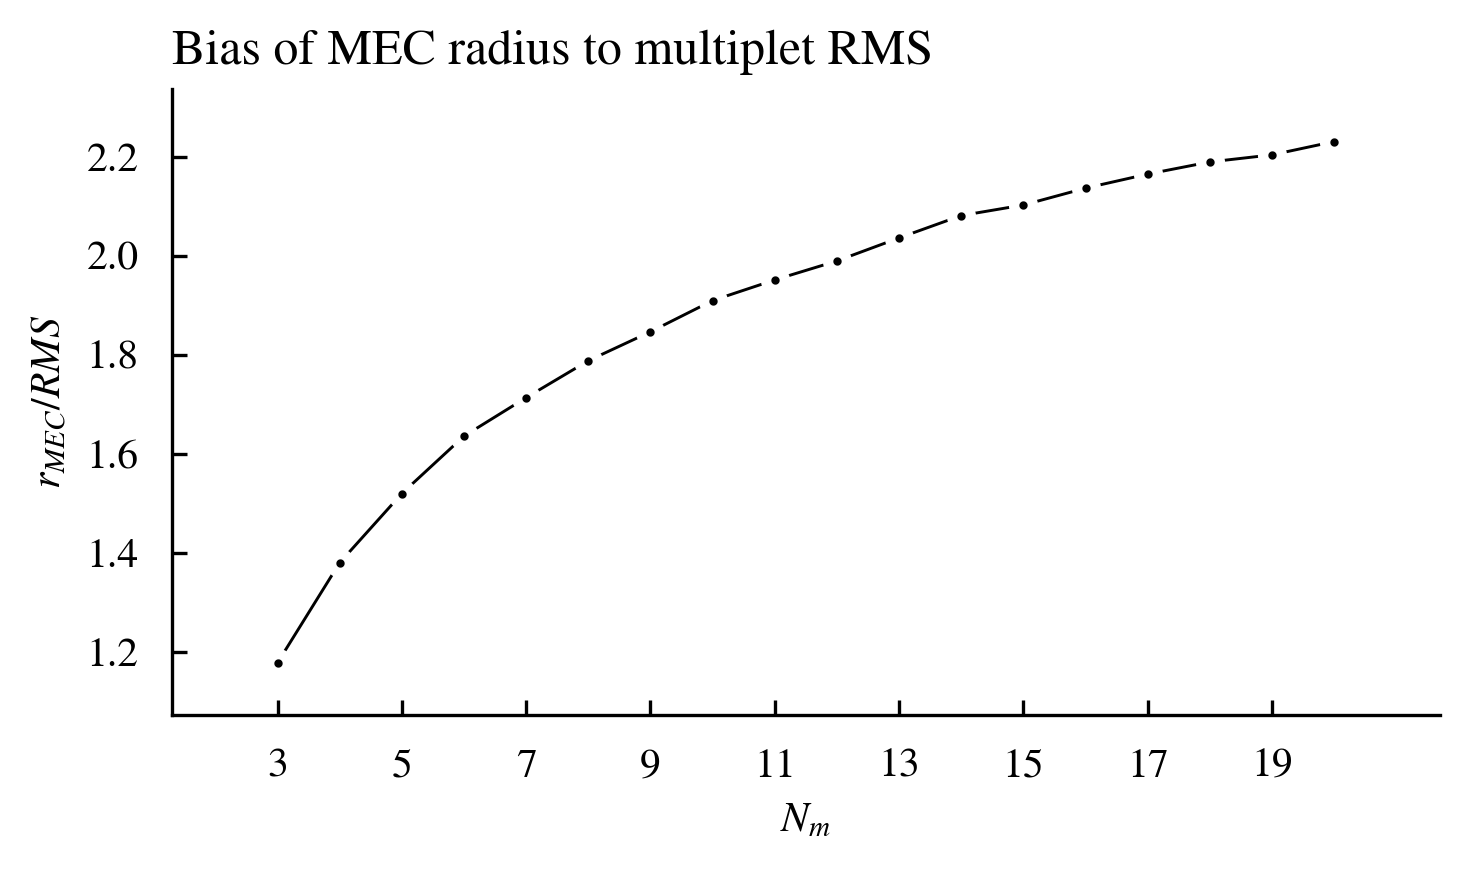

In [10]:
plt.figure(figsize=(5,3))
plt.scatter(range(3,21),[np.median(mec)/0.1 for mec in mec_radii],s=1,zorder=3)
plt.scatter(range(3,21),[np.median(mec)/0.1 for mec in mec_radii],color="white",zorder=2)
plt.plot(range(3,21),[np.median(mec)/0.1 for mec in mec_radii],zorder=1)
plt.xticks(range(3,21,2))
plt.xlabel(r"$N_{m}$")
plt.ylabel(r"$r_{MEC} / RMS$")
plt.title("Bias of MEC radius to multiplet RMS", loc="left")
# plt.savefig("figures/tests/rmec_over_rms_evolution.pdf")
plt.savefig("figures/tests/rmec_over_rms_evolution.png",facecolor="white")
# plt.show()
# plt.close()

In [12]:
import numpy as np
from scipy.stats import poisson,expon, uniform
from tqdm import tqdm

T = 10
mu = 1

A = uniform.rvs(0,T,size=(10000,10000))

L1 = [expon.fit(np.diff(np.sort(a)))[1]**-1 for a in tqdm(A)]

100%|██████████| 10000/10000 [00:06<00:00, 1631.00it/s]


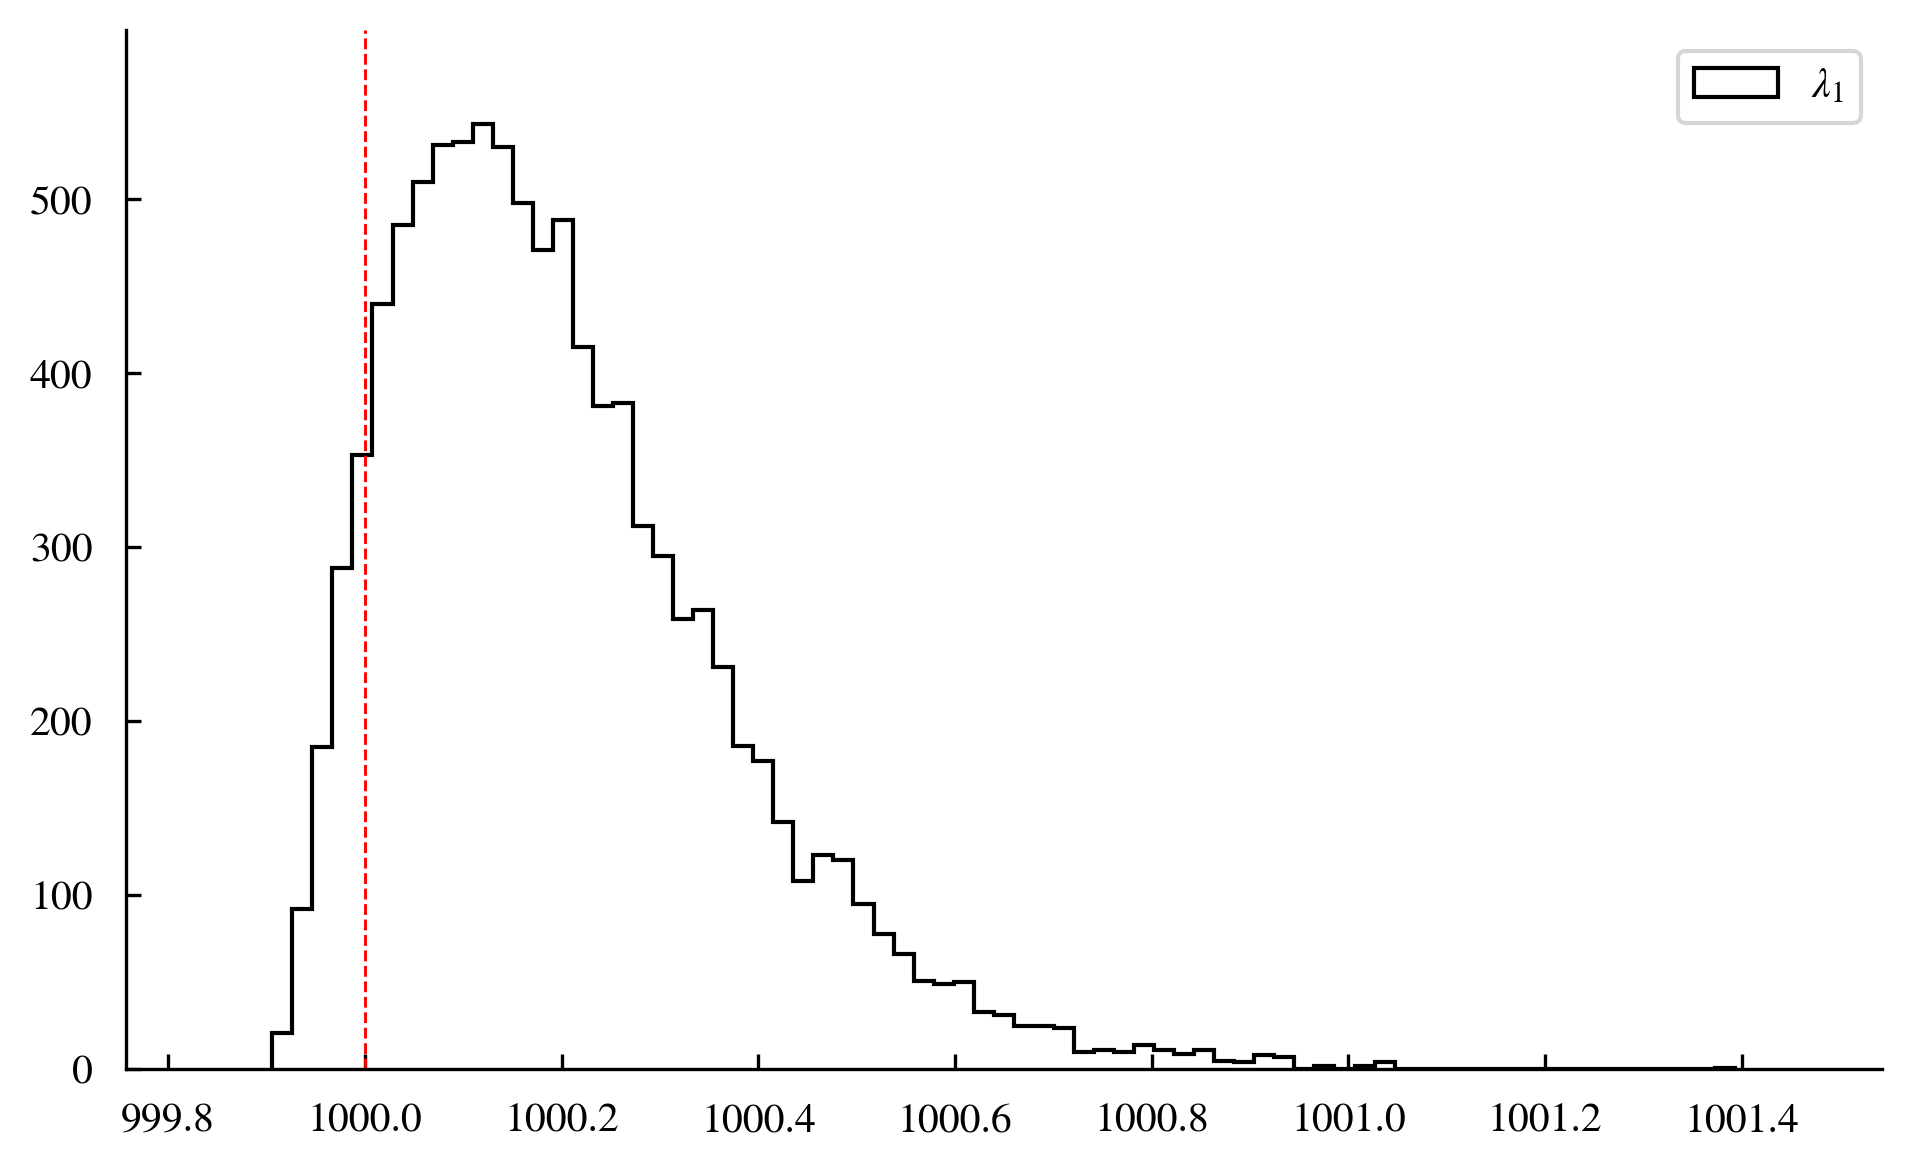

In [16]:
import matplotlib.pyplot as plt
h1 = plt.hist(L1,bins="fd",histtype="step",label=r"$\lambda_1$")
ylim = plt.ylim()
plt.vlines(1000,*ylim,color="red",ls="--")
plt.ylim(*ylim)
plt.legend()